In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [2]:
df=pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df=df.drop(['PassengerId','SibSp','Name','Parch','Ticket','Cabin','Embarked'],axis='columns')
y=df['Survived']

In [4]:
X=df.drop('Survived',1)
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [5]:
le_sex=LabelEncoder()


In [6]:
X['Gender_id']=le_sex.fit_transform(X['Sex'])

In [7]:
x=X.drop(['Sex'],axis='columns')

In [8]:
x

,Pclass,Age,Fare,Gender_id
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [9]:
x=x.drop('Age',1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
model=tree.DecisionTreeClassifier().fit(X_train,y_train)
model

DecisionTreeClassifier()

In [19]:
model.score(X_test,y_test)

0.8268156424581006

In [20]:
y_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[96, 12],
       [19, 52]], dtype=int64)

Text(114.0, 0.5, 'Truth')

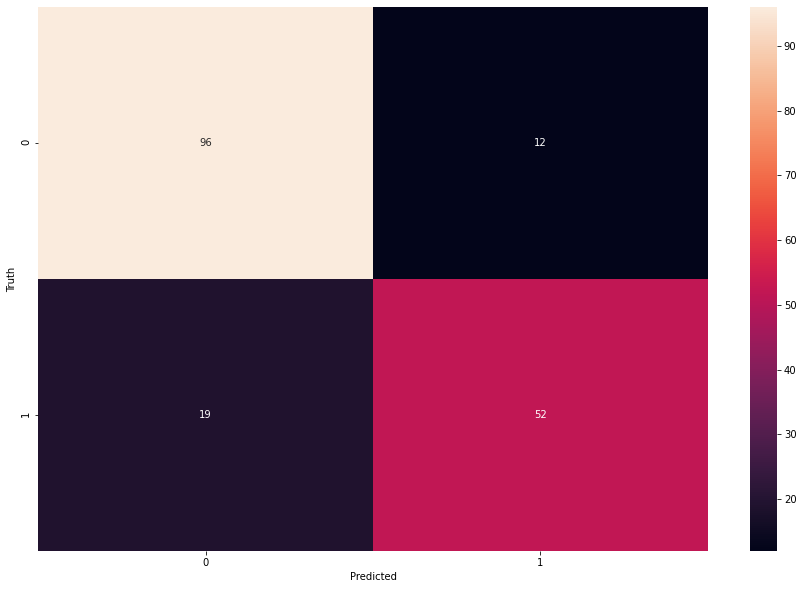

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(15,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')